In [2]:
import scipy.signal as scpeaks

In [3]:
scpeaks.find_peaks()

TypeError: find_peaks() missing 1 required positional argument: 'x'

In [4]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
with fits.open("calibrated/ch2_xsm_20210918_v1_level2.lc") as hdul1:
    hdul1.info()
    RATE = hdul1[1].data
RATE

Filename: calibrated/ch2_xsm_20210918_v1_level2.lc
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      15   ()      
  1  RATE          1 BinTableHDU     64   49740R x 4C   [D, E, E, E]   


FITS_rec([(1.48694401e+08, 174.36386, 13.204691, 1.),
          (1.48694402e+08, 179.25542, 13.38863 , 1.),
          (1.48694403e+08, 132.80539, 11.524122, 1.), ...,
          (1.48780797e+08, 419.75967, 20.488037, 1.),
          (1.48780798e+08, 395.45645, 19.886087, 1.),
          (1.48780799e+08, 464.4781 , 21.551754, 1.)],
         dtype=(numpy.record, [('TIME', '>f8'), ('RATE', '>f4'), ('ERROR', '>f4'), ('FRACEXP', '>f4')]))

In [7]:
LC = pd.DataFrame({"TIME" : RATE["TIME"], "RATE" : RATE["RATE"], "ERROR" : RATE["ERROR"], "FRACEXP" : RATE["FRACEXP"]})
LC

,TIME,RATE,ERROR,FRACEXP
0,1.486944e+08,174.363861,13.204691,1.0
1,1.486944e+08,179.255417,13.388630,1.0
2,1.486944e+08,132.805389,11.524122,1.0
3,1.486944e+08,165.179276,12.852209,1.0
4,1.486944e+08,166.161896,12.890380,1.0
...,...,...,...,...
49735,1.487808e+08,437.216888,20.909733,1.0
49736,1.487808e+08,396.128662,19.902981,1.0
49737,1.487808e+08,419.759674,20.488037,1.0
49738,1.487808e+08,395.456451,19.886087,1.0


In [9]:
with fits.open("calibrated/ch2_xsm_20210918_v1_level2.gti") as hdul2:
    hdul2.info()
    GTI = hdul2[1].data

Filename: calibrated/ch2_xsm_20210918_v1_level2.gti
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      15   ()      
  1  GTI           1 BinTableHDU     53   5R x 2C   [D, D]   


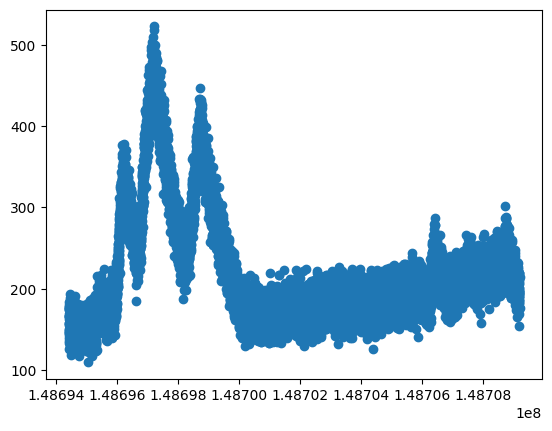

In [10]:
plt.scatter(LC['TIME'].iloc[0:14797], LC['RATE'].iloc[0:14797])

In [11]:
Bin=[]
Mean_rate=[]
for i in range(0,14797,120):
    Bin.append((i,i+120))
    Mean_rate.append((LC["RATE"].iloc[i:i+120]).mean())

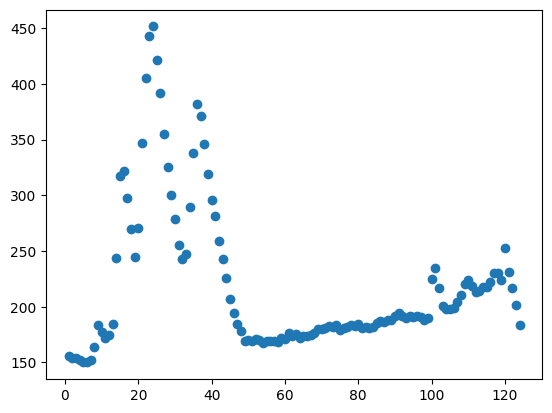

In [12]:
plt.scatter(np.arange(1,125),Mean_rate)

In [13]:
sigma= 0.5
x=np.linspace(-2*sigma,2*sigma,124)
gaussian = (1/((np.sqrt(2*np.pi))*sigma))*(np.exp(-(x/sigma)**2/2))
result = np.convolve(Mean_rate, gaussian, mode="same")

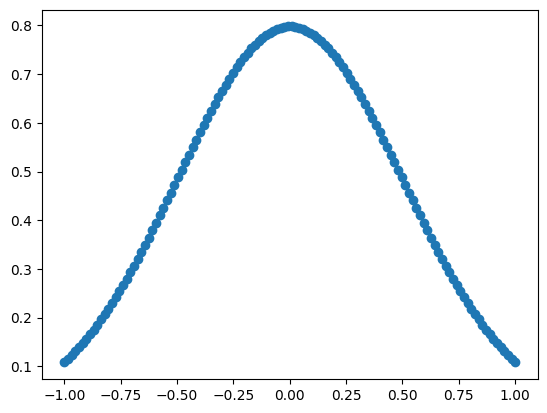

In [14]:
plt.scatter(x,gaussian)

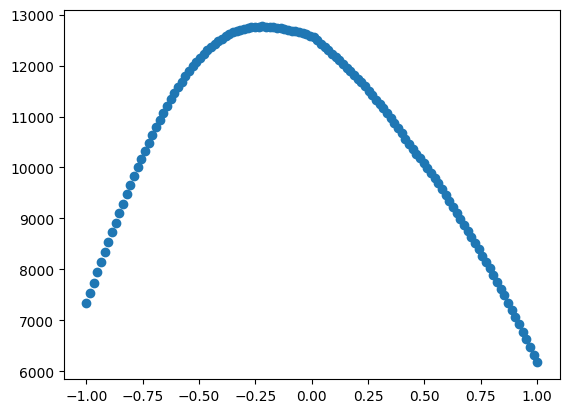

In [15]:
y=np.arange(0,len(Bin)+len(gaussian)-1)
plt.scatter(x,result)

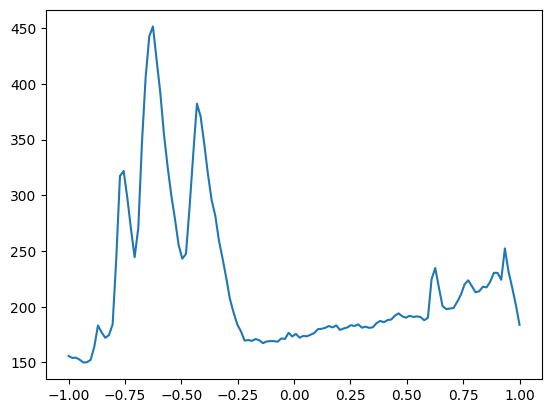

In [16]:
plt.plot(x,Mean_rate)

In [41]:
peak_indices = scpeaks.find_peaks(Mean_rate, prominence = 4)[0]
len(peak_indices)

11

In [ ]:
Tau_m = 0.01
for peak_index in peak_indices:
    index = peak_index
    while (Mean_rate(index) / Mean_rate(index + 3)) > Tau_m:
        
    Mean_rate(peak_index)